In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("GDP_during_pandemic_2020.csv")


Inspecting through the data and its properties


In [3]:
data.head()

,Country,Nominal_gdp_p_capita,PPP_gdp_p_capita,GDP_growth_percentage,Rise_fall_GDP
0,Afghanistan,581,2390.0,-5.000,medium fall
1,Albania,5287,14218.0,-3.500,medium fall
2,Algeria,3263,11112.0,-5.992,medium fall
3,Angola,2012,6932.0,-3.975,medium fall
4,Antigua and Barbuda,14168,18618.0,-17.273,very high fall


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                194 non-null    object 
 1   Nominal_gdp_p_capita   193 non-null    object 
 2   PPP_gdp_p_capita       193 non-null    float64
 3   GDP_growth_percentage  193 non-null    float64
 4   Rise_fall_GDP          193 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


Inspecting for any potential null values

In [5]:
data.isnull().sum()

Country                  0
Nominal_gdp_p_capita     1
PPP_gdp_p_capita         1
GDP_growth_percentage    1
Rise_fall_GDP            1
dtype: int64


Upon analysis only one country - Syria - has missing information in the entire row. Hence it would be best to remove the country from the dataset to minimize unfair analysis.


In [6]:
data.dropna(inplace=True)
data.isnull().sum()

Country                  0
Nominal_gdp_p_capita     0
PPP_gdp_p_capita         0
GDP_growth_percentage    0
Rise_fall_GDP            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                193 non-null    object 
 1   Nominal_gdp_p_capita   193 non-null    object 
 2   PPP_gdp_p_capita       193 non-null    float64
 3   GDP_growth_percentage  193 non-null    float64
 4   Rise_fall_GDP          193 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.0+ KB


Upon investigating the values, it was found that the Nominal_gdp_p_capita of _Samoa_ is not a float, rather is an object(string) which can cause issue when making calculations with the Nominal_gdp_p_capita values. Below those changes are being rectified for a much more accurate analysis

In [8]:
def clean_nominal_gdp(value):
    # Search for quotation marks in each value followed by
    # any characters repeated any number of times
    if re.search('\".*', str(value)):
  
        # Extract the position of the quotation marks pattern
        position = re.search('\"', str(value)).start()
  
        # return the cleaned value
        return value[:position]
    else:
        # if the vakue is clean up needed return the same value
        return value
          
data['Nominal_gdp_p_capita'] = data['Nominal_gdp_p_capita'].apply(clean_nominal_gdp)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                193 non-null    object 
 1   Nominal_gdp_p_capita   193 non-null    object 
 2   PPP_gdp_p_capita       193 non-null    float64
 3   GDP_growth_percentage  193 non-null    float64
 4   Rise_fall_GDP          193 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.0+ KB


According to the original resource, when analysing the 'Rise_Fall_GDP' column, it mentions whether a country's GDP has either fallen, risen or stayed the same.

Given further explanation, both the 'fall' and 'rise' growth can be broken down further into subcategories. Short, medium and higher with their percentages, 1%-3%, 3%-6% and 6%+ respectively.

In [9]:
data.corr()

,PPP_gdp_p_capita,GDP_growth_percentage
PPP_gdp_p_capita,1.000000,-0.056932
GDP_growth_percentage,-0.056932,1.000000



We see a negative correlation between PPP_gdp_p_capita and GDP_growth_percentage values


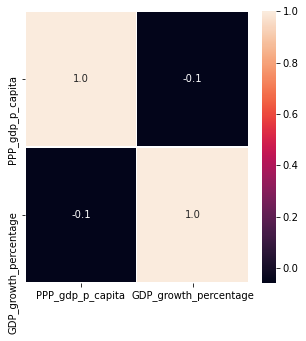

In [10]:
# correlation map
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [11]:
data.columns

Index(['Country', 'Nominal_gdp_p_capita', 'PPP_gdp_p_capita',
       'GDP_growth_percentage', 'Rise_fall_GDP'],
      dtype='object')


We can make use of a histogram plot on 'GDP_growth_percentage' values


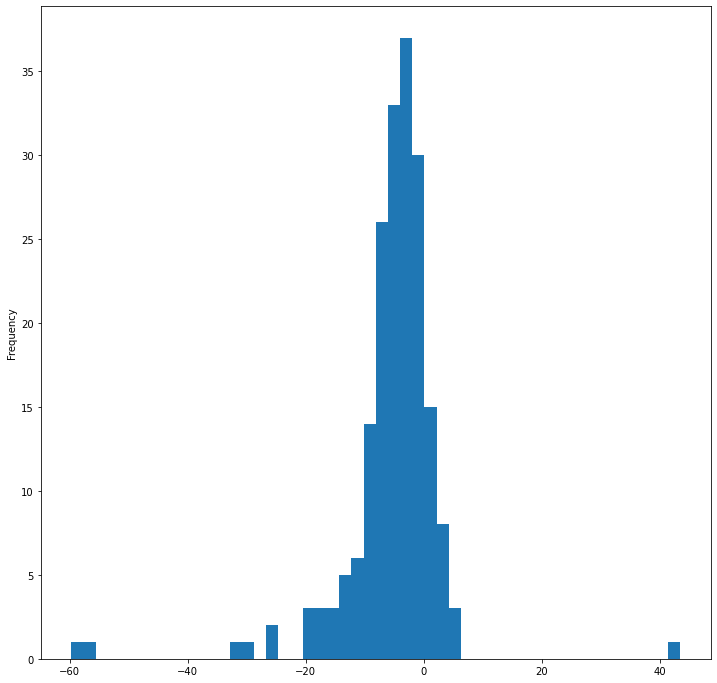

In [12]:
data.GDP_growth_percentage.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

This histogram shows a postive skewness although the heatamap shows that there is negative correlation. The outliers on both ends represent Macao with a very high fall coming in at 56.306%. Guyana with a very high rise coming in at 43.384%.

Upon further investigation Guyana's GDP growth rate was a very high rise globally considering that it is one of the poorest countries in South America. The reason behind this was "In 2020, Guyana’s economy entered a period of rapid growth brought on by the introduction of the oil sector" despite this happening during a pandemic.

More details have been provided in the link below:
https://repositorio.cepal.org/bitstream/handle/11362/47193/106/EI2021_Guyana_en.pdf

In addition Macao's GDP growth rate was a very high fall considering it being one of the richest countries in the world. Due to the Covid19, the main reason for their GDP fall is due to the tourism and gambling industries as they both play a huge role in their economy.

More details have been provided in the link below:
https://en.wikipedia.org/wiki/Economy_of_Macau#:~:text=Tourism%20and%20gambling,-Main%20articles%3A%20Gambling&text=Tourism%20is%20the%20backbone%20of,of%20revenue%20for%20the%20government




Original dataset:
https://www.kaggle.com/mdjafrilalamshihab/dataset-of-worldwide-gdp-during-covid-pandemic2020